### Outlier Detection using Local Outlier Factor

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/student_performance.csv')
df.sample(5)

,Hours Studied,Score Obtained,Outliers
86,814,99.157424,False
65,577,87.258382,False
17,132,3.179915,False
23,161,4.444669,False
56,448,59.290799,False


In [3]:
df.shape

(122, 3)

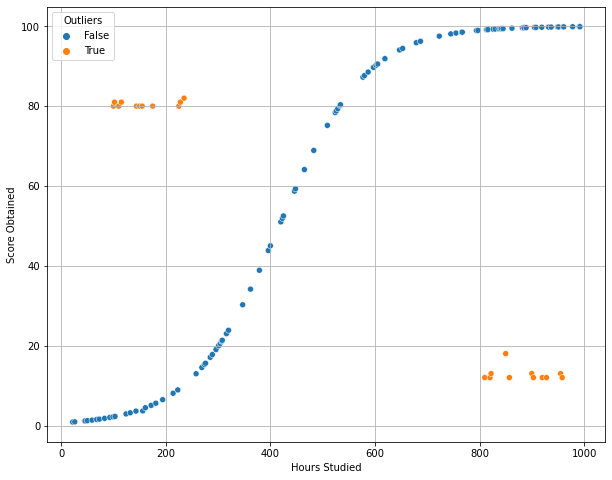

In [7]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.scatterplot(x='Hours Studied', y='Score Obtained', data=df, hue='Outliers')
ax.grid();

In [8]:
df.Outliers.value_counts()

False    100
True      22
Name: Outliers, dtype: int64

In [9]:
X = df.drop(['Outliers'], axis=1)
X.head()

,Hours Studied,Score Obtained
0,22,0.869736
1,26,0.912112
2,45,1.143020
3,46,1.156660
4,50,1.212843


In [10]:
from sklearn.neighbors import LocalOutlierFactor # Local Outlier Factor uses KNN to calculate LOF score

In [37]:
lof = LocalOutlierFactor(n_neighbors=20,
                            contamination=0.2, # contamination is the percentage of outliers
                            novelty=False) # novelty is set to false because we are not interested in the novelty score

y_pred = lof.fit_predict(X)
y_pred

array([-1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1, -1,
        1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
        1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
       -1, -1, -1])

In [38]:
print(f'Number of outliers: {np.sum(y_pred == -1)}')

Number of outliers: 25


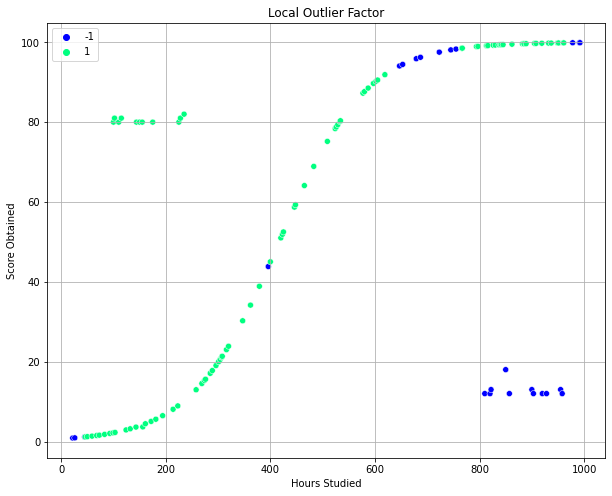

In [39]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.scatterplot(x='Hours Studied', y='Score Obtained', data=df, hue=y_pred, palette='winter')
plt.title('Local Outlier Factor')
ax.grid();

In [40]:
X_scores = lof.negative_outlier_factor_
X_scores

array([-1.14317945, -1.12665573, -1.0567161 , -1.05368781, -1.04373738,
       -1.02975328, -1.02410918, -1.02484211, -1.02727546, -1.02988938,
       -1.03039928, -0.98395541, -0.97939208, -1.01269424, -0.96696018,
       -0.96737591, -0.99460791, -0.97612705, -0.95809487, -1.01195749,
       -1.01531276, -1.02251399, -0.95511057, -0.95961389, -0.96145326,
       -1.02771782, -0.96891175, -0.97850146, -0.98619115, -0.99666125,
       -0.99361717, -0.99170612, -0.99282767, -1.0128736 , -1.00195489,
       -1.00102812, -1.00025359, -0.9905836 , -0.98924894, -0.97888615,
       -0.97709147, -0.97796595, -0.98004792, -0.98004792, -0.98118573,
       -0.98656031, -0.98884869, -1.01038906, -1.04174962, -1.04964314,
       -1.05547725, -1.04610136, -1.03406249, -1.01951322, -1.02146054,
       -1.03259426, -1.01717545, -1.02345066, -1.02929812, -1.03763217,
       -1.02886507, -1.02886507, -1.030146  , -1.03107404, -1.03100017,
       -1.02456492, -1.02425818, -1.02938883, -1.04024032, -1.04

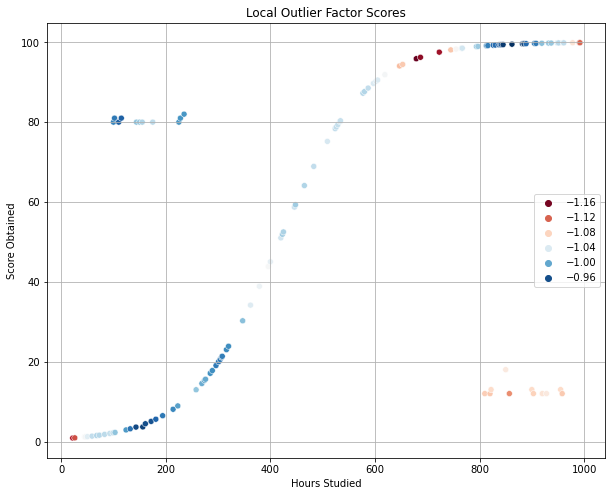

In [41]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.scatterplot(x='Hours Studied', y='Score Obtained', data=df, hue=X_scores, palette='RdBu')
plt.title('Local Outlier Factor Scores')
ax.grid();

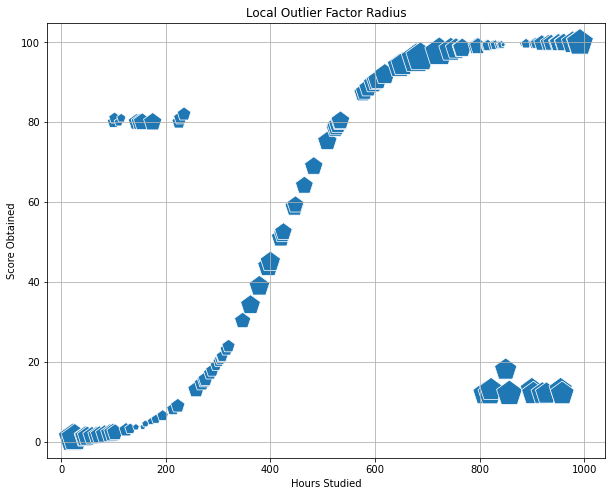

In [42]:
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
fig, ax = plt.subplots(figsize=(10, 8))

sns.scatterplot(x='Hours Studied', y='Score Obtained', data=df, s=radius*1000, marker='p')
plt.title('Local Outlier Factor Radius')
ax.grid();

### Isolation Forest

In [43]:
from sklearn.ensemble import IsolationForest
# Isolation Forest uses Random Forest to detect outliers
# leaf nodes closest to the root have high probability of being outliers

In [44]:
isf = IsolationForest(contamination=0.19)
y_pred = isf.fit_predict(X)
y_pred

C:\Users\Safiuddin\anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


array([-1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,
        1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
       -1, -1, -1])

In [46]:
print(f'Number of outliers: {np.sum(y_pred == -1)}')

Number of outliers: 23


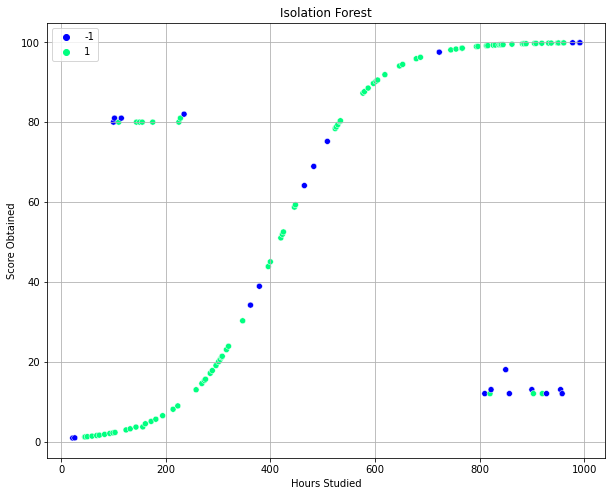

In [45]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x='Hours Studied', y='Score Obtained', data=df, hue=y_pred, palette='winter')
plt.title('Isolation Forest')
ax.grid();

In [47]:
xx, yy = np.meshgrid(
    np.linspace(0, 1010, 500),
    np.linspace(0, 102, 500)
)
print('xx = ', xx.ravel())
print('yy = ', yy.ravel())

xx =  [   0.            2.0240481     4.04809619 ... 1005.95190381 1007.9759519
 1010.        ]
yy =  [  0.   0.   0. ... 102. 102. 102.]


In [48]:
np.c_[xx.ravel(), yy.ravel()]

array([[   0.        ,    0.        ],
       [   2.0240481 ,    0.        ],
       [   4.04809619,    0.        ],
       ...,
       [1005.95190381,  102.        ],
       [1007.9759519 ,  102.        ],
       [1010.        ,  102.        ]])

In [49]:
Z = isf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
Z

C:\Users\Safiuddin\anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]])

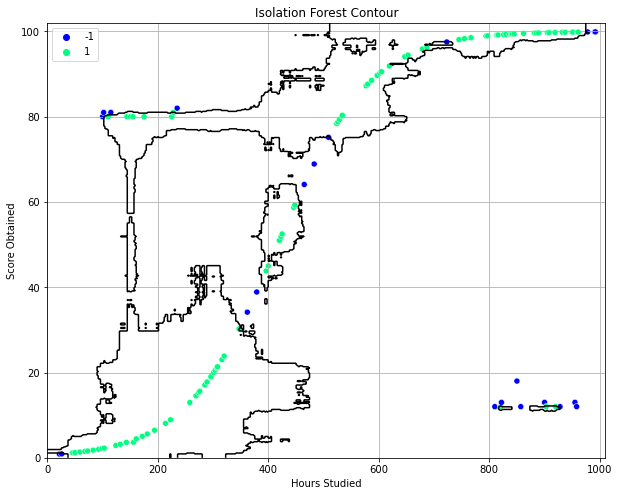

In [57]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.contour(xx, yy, Z, levels=[0], colors='black')
sns.scatterplot(x='Hours Studied', y='Score Obtained', data=df, hue=y_pred, palette='winter')
plt.title('Isolation Forest Contour')
ax.grid();

### Elliptic Envelope

In [58]:
from sklearn.covariance import EllipticEnvelope

In [59]:
ee = EllipticEnvelope(support_fraction=1., contamination=0.19)
y_pred = ee.fit_predict(X)
y_pred

array([-1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1,
        1,  1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
        1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
        1,  1,  1])

In [61]:
print(f'Number of outliers: {np.sum(y_pred == -1)}')

Number of outliers: 23


In [76]:
xx, yy = np.meshgrid(
    np.linspace(-20, 1300, 500),
    np.linspace(-20, 150, 500)
)
Z = ee.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

C:\Users\Safiuddin\anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but EllipticEnvelope was fitted with feature names
  "X does not have valid feature names, but"


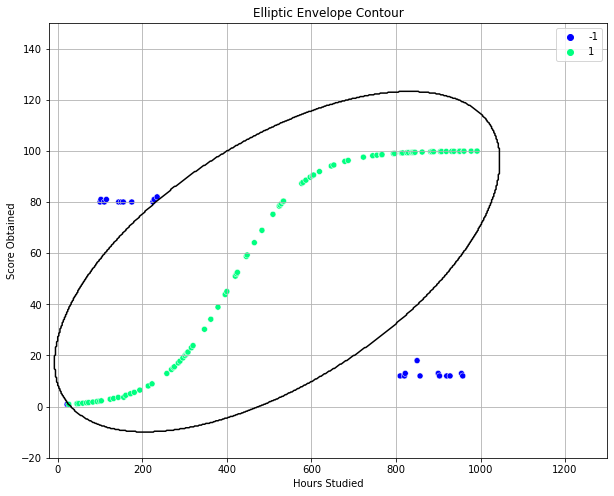

In [77]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.contour(xx, yy, Z, levels=[0], colors='black')
sns.scatterplot(x='Hours Studied', y='Score Obtained', data=df, hue=y_pred, palette='winter')
plt.title('Elliptic Envelope Contour')
ax.grid();

## Novelty Detection
### Local Outlier Factor

In [78]:
df = pd.read_csv('data/student_performance_modified.csv')
df.sample(5)

,Hours Studied,Score Obtained,Outliers,Training,Test
83,797,98.968717,False,1,0
50,396,43.831583,False,0,1
37,285,17.079548,False,1,0
45,316,23.005512,False,1,0
105,905,99.715686,False,1,0


In [79]:
df.shape

(122, 5)

In [83]:
X_training = df.loc[df['Training'] == 1]
X_training.shape

(50, 5)

In [85]:
X_training = X_training.drop(columns=['Outliers', 'Training', 'Test'])
X_training.head()

,Hours Studied,Score Obtained
1,26,0.912112
3,46,1.156660
5,59,1.349299
7,73,1.592205
9,93,2.015385


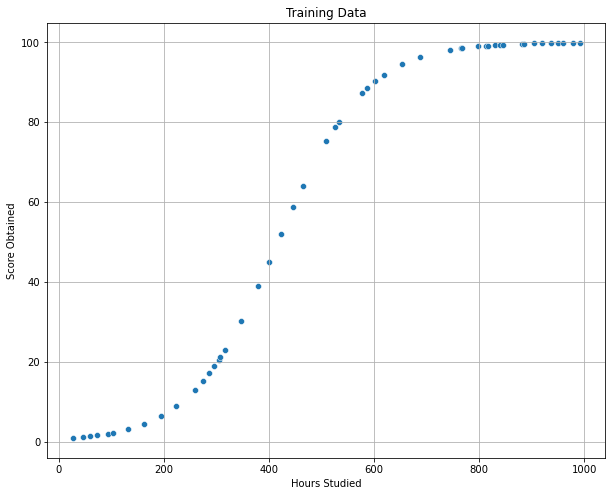

In [87]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x='Hours Studied', y='Score Obtained', data=X_training)
plt.title('Training Data')
ax.grid();

In [88]:
X_test = df.loc[df['Test'] == 1]
print(X_test.shape)
X_test = X_test.drop(columns=['Outliers', 'Training', 'Test'])
X_test.head()

(72, 5)


,Hours Studied,Score Obtained
0,22,0.869736
2,45,1.143020
4,50,1.212843
6,68,1.500874
8,83,1.791570


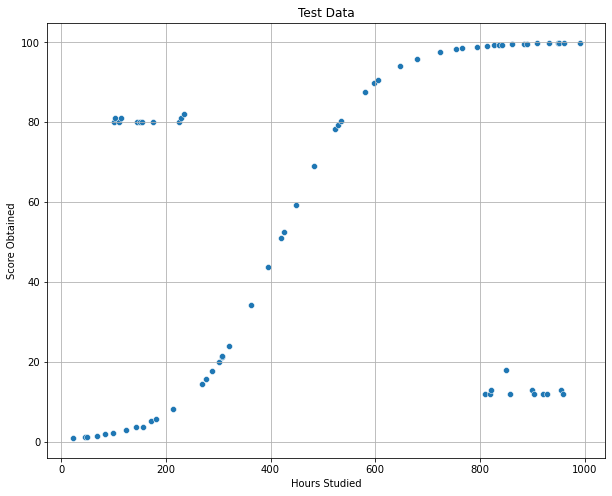

In [89]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x='Hours Studied', y='Score Obtained', data=X_test)
plt.title('Test Data')
ax.grid();

In [90]:
lof_novelty = LocalOutlierFactor(
    n_neighbors=5,
    contamination='auto',
    novelty=True # novelty is set to true because we are interested in novelty detection
)
lof_novelty.fit(X_training)
y_pred = lof_novelty.predict(X_test)

C:\Users\Safiuddin\anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  "X does not have valid feature names, but"


In [91]:
print(f' Number of outliers: {np.sum(y_pred == -1)}')

 Number of outliers: 14


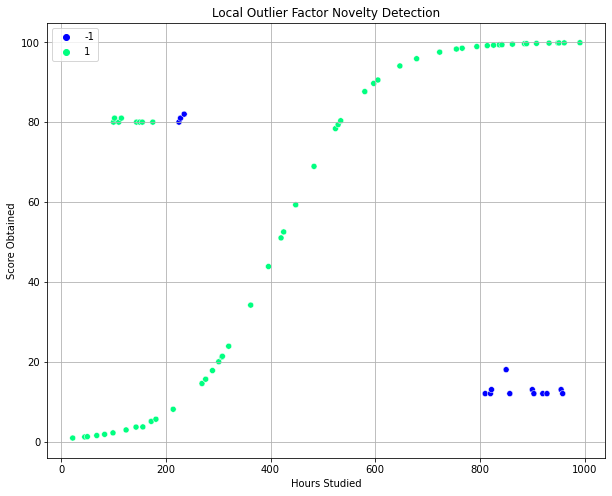

In [92]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x='Hours Studied', y='Score Obtained', data=X_test, hue=y_pred, palette='winter')
plt.title('Local Outlier Factor Novelty Detection')
ax.grid();

C:\Users\Safiuddin\anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  "X does not have valid feature names, but"


 Number of outliers: 22


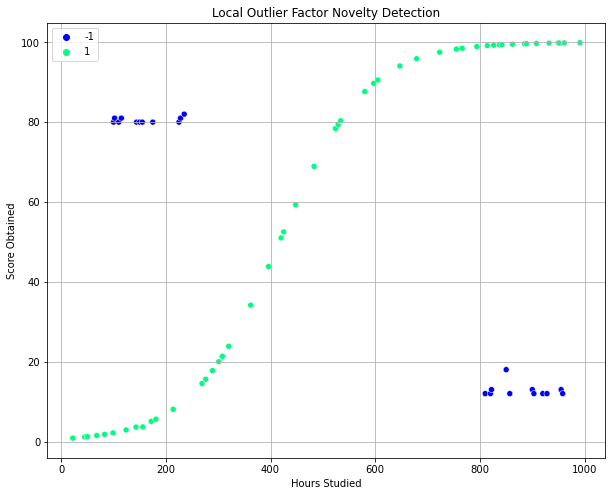

In [93]:
lof_novelty = LocalOutlierFactor(
    n_neighbors=5,
    contamination=0.01,
    novelty=True # novelty is set to true because we are interested in novelty detection
)
lof_novelty.fit(X_training)
y_pred = lof_novelty.predict(X_test)
print(f' Number of outliers: {np.sum(y_pred == -1)}')
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x='Hours Studied', y='Score Obtained', data=X_test, hue=y_pred, palette='winter')
plt.title('Local Outlier Factor Novelty Detection')
ax.grid();

In [95]:
INLIER = np.array([[500, 99]])
OUTLIER = np.array([[10000, 40000]])
lof_novelty.predict(INLIER), lof_novelty.predict(OUTLIER)

C:\Users\Safiuddin\anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Safiuddin\anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  "X does not have valid feature names, but"


(array([1]), array([-1]))

In [96]:
lof_novelty.score_samples(INLIER), lof_novelty.score_samples(OUTLIER) # Novelty scores

C:\Users\Safiuddin\anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Safiuddin\anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  "X does not have valid feature names, but"


(array([-1.01386409]), array([-818.57692939]))

In [97]:
lof_novelty.decision_function(INLIER), lof_novelty.decision_function(OUTLIER)

C:\Users\Safiuddin\anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Safiuddin\anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  "X does not have valid feature names, but"


(array([0.39025402]), array([-817.17281128]))

In [98]:
isf.predict(INLIER), isf.predict(OUTLIER)

C:\Users\Safiuddin\anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Safiuddin\anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


(array([-1]), array([-1]))

In [99]:
ee.predict(INLIER), ee.predict(OUTLIER)

C:\Users\Safiuddin\anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but EllipticEnvelope was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Safiuddin\anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but EllipticEnvelope was fitted with feature names
  "X does not have valid feature names, but"


(array([1]), array([-1]))

In [100]:
df = pd.read_csv('data/headbrain.csv')
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [101]:
df.shape

(237, 4)

In [102]:
df.columns

Index(['Gender', 'Age Range', 'Head Size(cm^3)', 'Brain Weight(grams)'], dtype='object')

In [103]:
HEAD_SIZE = 'Head Size(cm^3)'
BRAIN_WEIGHT = 'Brain Weight(grams)'

In [104]:
X = df[[HEAD_SIZE, BRAIN_WEIGHT]]
X.sample(10)

,Head Size(cm^3),Brain Weight(grams)
187,3069,1022
11,3993,1380
160,3071,1078
23,3710,1270
190,3165,1237
170,3145,1202
75,3394,1195
180,3689,1290
24,4747,1635
227,4204,1380


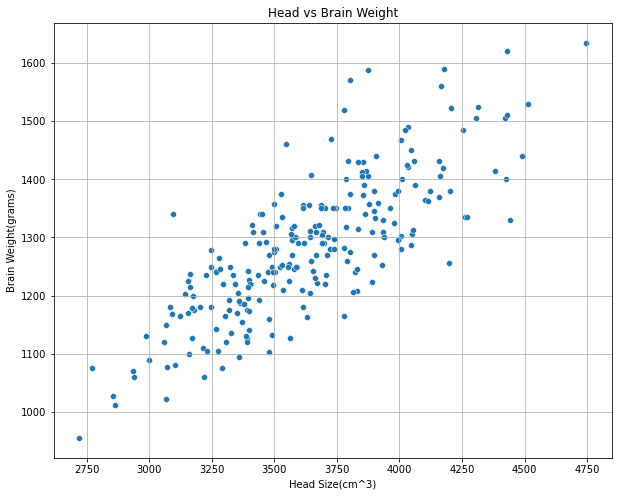

In [105]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=HEAD_SIZE, y=BRAIN_WEIGHT, data=df)
plt.title('Head vs Brain Weight')
plt.grid();

In [106]:
ee = EllipticEnvelope(contamination=0.1, support_fraction=None)
y_pred = ee.fit_predict(X)
print(f'Number of outliers: {np.sum(y_pred == -1)}')

Number of outliers: 24


In [107]:
xx, yy = np.meshgrid(
    np.linspace(X[HEAD_SIZE].min(), X[HEAD_SIZE].max(), 500),
    np.linspace(X[BRAIN_WEIGHT].min(), X[BRAIN_WEIGHT].max(), 500)
)
Z = ee.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

C:\Users\Safiuddin\anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but EllipticEnvelope was fitted with feature names
  "X does not have valid feature names, but"


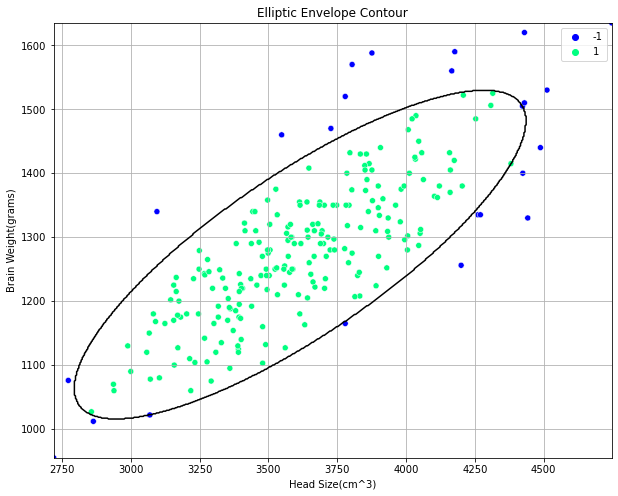

In [108]:
plt.figure(figsize=(10, 8))
plt.contour(xx, yy, Z, levels=[0], colors='black')
sns.scatterplot(x=HEAD_SIZE, y=BRAIN_WEIGHT, data=df, hue=y_pred, palette='winter')
plt.title('Elliptic Envelope Contour')
plt.grid();

In [109]:
isf = IsolationForest(contamination=0.08)
y_pred = isf.fit_predict(X)
print(f'Number of outliers: {np.sum(y_pred == -1)}')

Number of outliers: 19


C:\Users\Safiuddin\anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


C:\Users\Safiuddin\anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


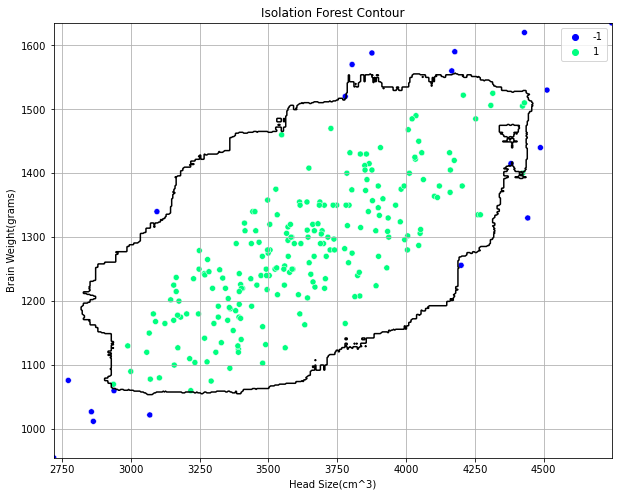

In [110]:
Z = isf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contour(xx, yy, Z, levels=[0], colors='black')
sns.scatterplot(x=HEAD_SIZE, y=BRAIN_WEIGHT, data=df, hue=y_pred, palette='winter')
plt.title('Isolation Forest Contour')
plt.grid();

Number of outliers: 12


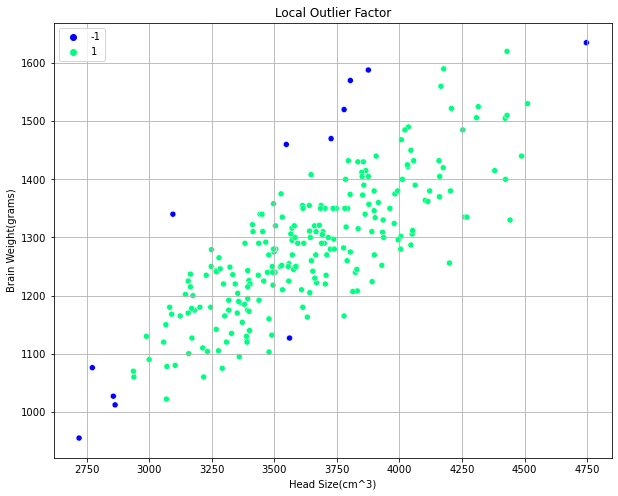

In [111]:
lof = LocalOutlierFactor(n_neighbors=15, contamination='auto')
y_pred = lof.fit_predict(X)
print(f'Number of outliers: {np.sum(y_pred == -1)}')

plt.figure(figsize=(10, 8))
sns.scatterplot(x=HEAD_SIZE, y=BRAIN_WEIGHT, data=df, hue=y_pred, palette='winter')
plt.title('Local Outlier Factor')
plt.grid();